In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EHvX6o0_FS6UZfF2S2Bum4RNsG9aSTW9Lw2_IcT2JC61',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'waterquality-donotdelete-pr-f9ere0iqfl9j3w'
object_key = 'water_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# ANALYSIS

In [5]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [6]:
df.shape

(1991, 12)

In [7]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# Handling Missing Values

In [9]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [10]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [11]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce') 
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [12]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [13]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [14]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)


In [15]:
df.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [16]:
#Re-naming columns for simplification
df=df.rename(columns={'D.O. (mg/l)':'do'})
df=df.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
df=df.rename(columns={'B.O.D. (mg/l)':'bod'})
df=df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
df=df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
df=df.rename(columns={'STATION CODE':'station'})
df=df.rename(columns={'LOCATIONS':'location'})
df=df.rename(columns={'STATE':'state'})
df=df.rename(columns={'PH':'ph'})

# WQI Calculation

In [17]:
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)
 else(80 if (8.6>=x>=8.5) or (6.9>=x>=5.8) 
      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
           else(40 if (9>=x>=8.8) or (6.7>=x>=6.5) 
                else 0)))))


In [18]:
df['ndo' ]=df.do.apply(lambda x: (100 if (x>=6) 
                                      else(80 if (6>=x>=5.1) 
                                           else (60 if (5>=x>=4.1) 
                                                 else(40 if (4>=x>=3) 
                                                      else 0)))))

In [19]:
df['nco']=df.tc.apply(lambda x: (100 if (5>=x>=0)

else(80 if (50>=x>=5)

else (60 if (500>=x>=50)

else(40 if (10000>=x>=500)

else 8)))))

#cale of B.D.O

df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)

else(80 if (6>=x>=3)

else(60 if (80>=x>=6)

else(48 if (125>=x>=80)

else 0)))))

In [20]:
#calculation of electrical conductivity

df['nec']=df.co.apply(lambda

x: (100 if (75>=x>=0)

else (80

if (150>=x>=75)

else (60 if (225>=x>=150)

else(40 if (300>=x>=225)

else 0)))))
#calulation of nitrate

df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)

else(80 if (50>=x>=20)

else(60 if (100>=x>=50)

else (40 if (200>=x>=100)

else 0)))))

In [21]:
df ['wph']=df.npH*0.165

df['wdo']=df.ndo*0.281 
df['wbdo']=df.nbdo*0.234

df['wec']=df.nec*0.009

df['wna']=df.nna*0.028

df['wco']=df.nco*0.281

df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco
df

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [22]:
#average=df.groupby('year')['wqi'].mean()
#average.head()

# Visualization

<AxesSubplot:>

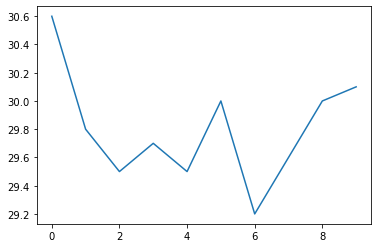

In [23]:
#univariatr analysis
df.head(10).Temp.plot()

<AxesSubplot:xlabel='bod', ylabel='do'>

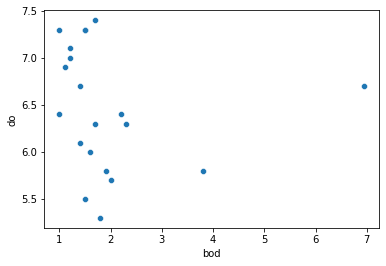

In [24]:
#Bivariate Analysis
sns.scatterplot(df.head(20).bod,df.head(20).do) 

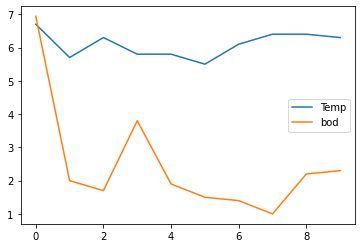

In [25]:
df.head(10).do.plot()
df.head(10).bod.plot()
plt.legend(['Temp','bod'])

<AxesSubplot:>

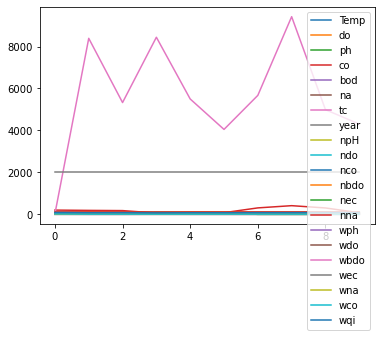

In [26]:
#Mulitivariate Analysis
df.head(10).plot()

In [27]:
df.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)


In [28]:
df.head(50)

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,84.460
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,76.960
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,79.280
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,69.340
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,77.140
5,5.5,7.4,81.0,1.500000,0.1,4049.0,2014,77.140
6,6.1,6.7,308.0,1.400000,0.3,5672.0,2014,78.740
7,6.4,6.7,414.0,1.000000,0.2,9423.0,2014,78.740
8,6.4,7.6,305.0,2.200000,0.1,4990.0,2014,82.040
9,6.3,7.6,77.0,2.300000,0.1,4301.0,2014,82.760


# X and Y split

In [29]:
x=df.iloc[:,0:7]
y=df.iloc[:,7:]

In [30]:
x.shape

(1991, 7)

In [31]:
y.shape

(1991, 1)

In [32]:
x.head()

,do,ph,co,bod,na,tc,year
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [33]:
y.head()

,wqi
0,84.46
1,76.96
2,79.28
3,69.34
4,77.14


# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
x_train.shape

(1592, 7)

In [37]:
x_test.shape

(399, 7)

In [38]:
y_train.shape

(1592, 1)

In [39]:
y_train.shape

(1592, 1)

In [40]:
x_test


,do,ph,co,bod,na,tc,year
1594,0.8,6.80,2156.0,7.4,1.000000,20733.00000,2007
1682,6.5,8.14,16410.0,5.3,1.397000,2400.00000,2006
731,8.1,8.00,162.0,1.8,1.623079,26.00000,2012
1661,7.0,7.60,210.0,2.4,1.623079,137.00000,2007
1958,7.3,157.00,6.0,5.6,0.603000,221.00000,2003
...,...,...,...,...,...,...,...
312,6.8,7.70,7207.0,3.9,4.250000,120.00000,2013
930,4.6,6.90,98.0,0.6,0.110000,348.00000,2011
609,6.5,6.90,12150.0,1.8,0.520000,1481.00000,2012
936,7.7,7.40,121.0,1.4,0.640000,1255.00000,2011


In [41]:
y_test

,wqi
1594,32.288
1682,77.360
731,93.820
1661,88.200
1958,67.380
...,...
312,82.980
930,73.840
609,78.740
936,82.760


# Model Building

# Linear Regression

In [42]:
#from sklearn.linear_model import LinearRegression
#model1=LinearRegression()

In [43]:
#model1.fit(x_train,y_train)

In [44]:
#train_pred=model1.predict(x_train)

In [45]:
from sklearn import metrics
#metrics.r2_score(y_train,train_pred)

# Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/tmp/wsuser/ipykernel_165/3346696895.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [47]:
metrics.r2_score(y_test, y_pred)

0.9743920713924711

In [48]:
print(model.predict([[6.7,7.5,203.0,6.940049,0.1,27.0,2014]]))


[83.156]


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
model.predict([[7.3,6.7,144.0,1.500000,0.1,3052.0,2014]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([79.46])

In [50]:
y_pred

array([38.0744, 77.36  , 93.82  , 88.2   , 68.316 , 93.82  , 73.048 ,
       82.742 , 33.2004, 88.02  , 88.2   , 82.94  , 85.08  , 79.64  ,
       82.94  , 85.08  , 38.2384, 84.72  , 73.048 , 72.154 , 81.708 ,
       54.3468, 82.04  , 82.58  , 85.26  , 37.5172, 83.7   , 63.688 ,
       79.1   , 88.2   , 68.422 , 77.024 , 88.38  , 52.448 , 85.26  ,
       72.06  , 87.66  , 87.66  , 79.46  , 84.36  , 82.04  , 85.26  ,
       85.26  , 46.1948, 88.56  , 73.606 , 70.946 , 92.624 , 79.64  ,
       35.3652, 68.688 , 91.482 , 58.068 , 82.94  , 76.42  , 84.536 ,
       82.04  , 84.72  , 85.26  , 73.048 , 83.502 , 74.02  , 88.56  ,
       46.626 , 58.068 , 87.66  , 79.64  , 73.714 , 66.44  , 82.98  ,
       92.884 , 93.64  , 83.52  , 87.66  , 79.46  , 88.47  , 82.94  ,
       90.322 , 82.58  , 82.76  , 83.7   , 79.172 , 84.36  , 84.36  ,
       88.47  , 66.912 , 65.06  , 83.7   , 94.18  , 72.606 , 79.46  ,
       78.03  , 66.44  , 86.724 , 58.068 , 41.5332, 82.76  , 42.1432,
       79.46  , 82.9

# Save the Model

## IBM Deployment

In [51]:
!pip install -U ibm-watson-machine-learning

In [52]:
from ibm_watson_machine_learning import APIClient
import json

## Authenticate and set space

In [60]:
wml_credentials = {
    "apikey":"DhAX4qyVNw37UViVP9kWoz2UcYqGM-CoKWoFQHNK5MCb",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [61]:
wml_client = APIClient(wml_credentials)

In [62]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
e93c9f65-452d-4459-918a-85e3ad01758b  WaterQuality  2022-11-16T07:49:06.853Z
3ff31550-185a-4aec-9b51-95a816dad37a  B7-insurance  2022-11-12T05:50:27.688Z
824c8352-fd30-4c61-8eef-e8295c910833  iris-B7       2022-11-11T07:28:37.790Z
------------------------------------  ------------  ------------------------


In [63]:
SPACE_ID= "e93c9f65-452d-4459-918a-85e3ad01758b"

In [64]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [65]:
wml_client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## Save and Deploy the model

In [66]:
import sklearn
sklearn.__version__

'1.0.2'

In [67]:
MODEL_NAME = 'WaterQuality'
DEPLOYMENT_NAME = 'WaterQuality'
DEMO_MODEL = model

In [68]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [69]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [70]:
#Save model

model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [71]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'wqi',
  'schemas': {'input': [{'fields': [{'name': 'do', 'type': 'float64'},
      {'name': 'ph', 'type': 'float64'},
      {'name': 'co', 'type': 'float64'},
      {'name': 'bod', 'type': 'float64'},
      {'name': 'na', 'type': 'float64'},
      {'name': 'tc', 'type': 'float64'},
      {'name': 'year', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-16T07:53:18.852Z',
  'id': 'ec259343-f5bf-4248-bbc1-c02eb9700df7',
  'modified_at': '2022-11-16T07:53:22.523Z',
  'name': 'WaterQuality',
  'owner': 'IBMid-6620041R6Q',
  'resource_key': 'f004a55d-7b2d-4185-919d-91b0a32310bd',
  'space_id': 'e93c9f65-452d-4459-918a-85e3ad01758b'},
 'system': {'warnings': []}}

In [72]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'ec259343-f5bf-4248-bbc1-c02eb9700df7'

In [73]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [74]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'ec259343-f5bf-4248-bbc1-c02eb9700df7' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6a2cd8b2-6371-417f-9dae-f60de85b61aa'
------------------------------------------------------------------------------------------------


